# SP500 Stock filter
- Uses S&P500 stock data (date range: 04/01/2010-18/04/2024)
- Files used: sp500_stock.csv (downloaded from Kaggle -> https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks/data)
- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mbd
import csv, datetime

from pandas import Series, DataFrame
from matplotlib.dates import YearLocator, MonthLocator, DayLocator, DateFormatter

In [2]:
# filters data based on a specified date
def date_filter(year_specific, dataFrame):
    years = str(year_specific)
    dates = dataFrame
    return dates.dt.strftime('%Y') == years

In [3]:
# creates stock chart (x = dates, y = normal prices or MA prices)
def graph_maker(dates, prices, movingAvgData, xlabelYear, graphTicker):
    fig, axes = plt.subplots(1, 1, figsize=(20, 20))  # creates the blank graph space to draw the graph on

    dateFormat = pd.to_datetime(dates)  # converts the data DF into datetime format and makes a new DF
    
    normalDataPlot = axes.plot(dateFormat, prices, color = 'black')  # plots the normal price against date
    smaPlot = axes.plot(dateFormat, movingAvgData, color = 'green')  # plots moving avg data against date
    
    
    axes.set_title(graphTicker +' '+str(xlabelYear))  # sets the title according to the chosen ticker name and year

    # all this shit is for to set the x axis labels to show the dates, mont by month
    axes.xaxis.set_major_locator(mbd.MonthLocator())    
    axes.xaxis.set_major_formatter(mbd.DateFormatter('%Y-%m'))
    axes.set_xticks(axes.get_xticks())

    fig.autofmt_xdate()

In [4]:
def SMA_correlation(x, y):
    pass


## Main Code

dict_values(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX

Please input a ticker symbol:  AMD
Please input a specific column (Open, Close, High, Low):  Close
Input year between 2010 and 2024:  2013


Symbol
MMM    False
MMM    False
MMM    False
MMM    False
MMM    False
       ...  
ZTS    False
ZTS    False
ZTS    False
ZTS    False
ZTS    False
Name: Date, Length: 1809291, dtype: bool


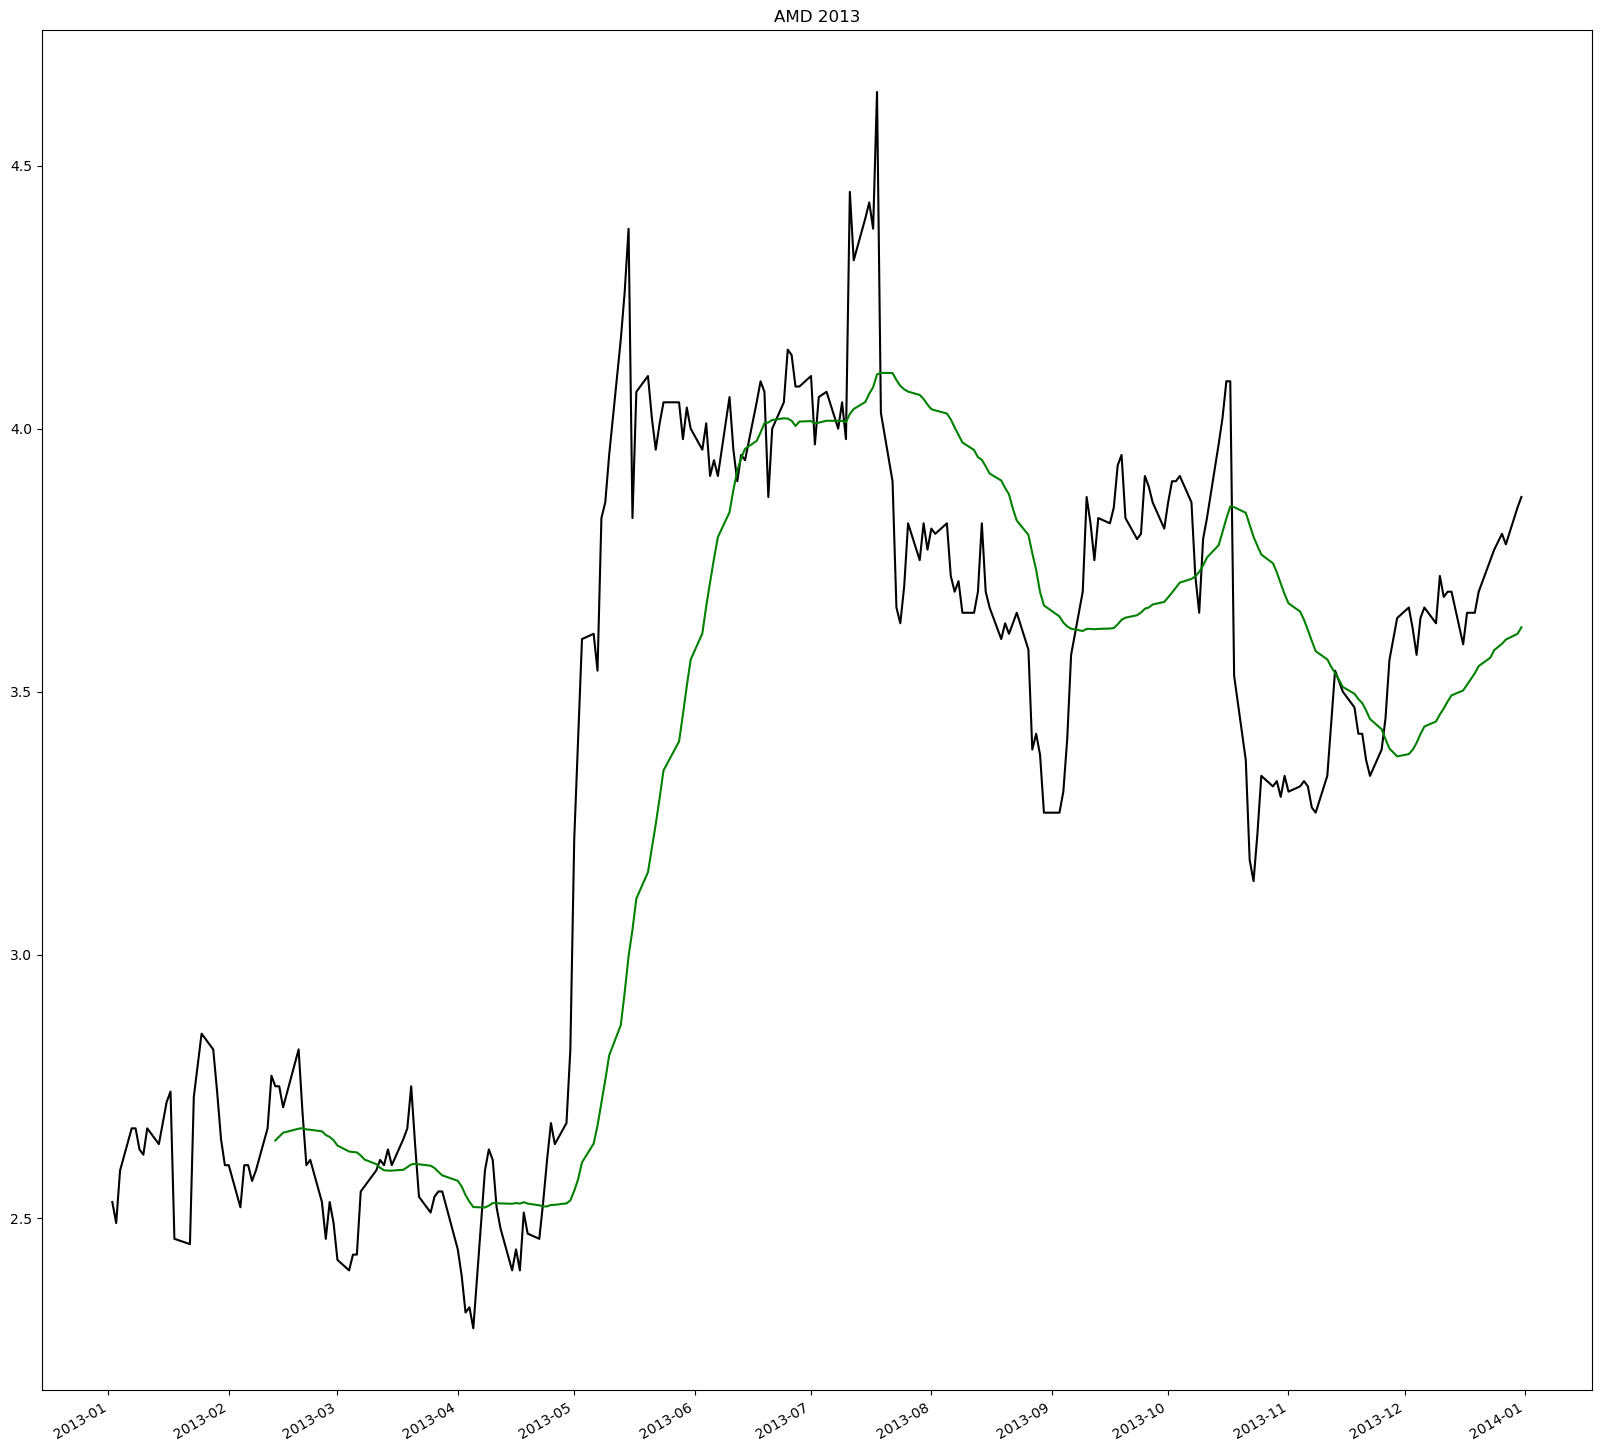

In [5]:
with open('sp500_stocks.csv', 'r') as stockData:
    stockFile = pd.read_csv(stockData)  # producing a dataframe from the CSV file

    # extracts Symbol column and converts into a Series
    symbolColumn = pd.Series(stockFile['Symbol'])
    stockDF = (stockFile.set_index(symbolColumn)).drop(columns='Symbol')  # replaces the index integer labels with the Symbol column

    # creates a dataframe from the 'dates' column, also converting to datetime format
    date_time = pd.to_datetime(stockDF['Date'], format = '%Y-%m-%d')  

    # error handling for stock name input (work in progress)
    symbolCheckerDict = symbolColumn.drop_duplicates().to_dict()  # creates a dictionary from the stockName dataframe; also removes the duplicates
    
    # MAIN CODE
    
    print(symbolCheckerDict.values())
    
    tickerInput = input('Please input a ticker symbol: ')
    columnInput = input('Please input a specific column (Open, Close, High, Low): ')
    
    while True:
            try:
                yearInput = int(input("Input year between 2010 and 2024: "))
                if yearInput >= 2010 and yearInput <= 2024:
                    dateSpecific = date_filter(yearInput, date_time)
                    
                    dateTicker = (stockDF[dateSpecific].loc[[str(tickerInput)]])  # outputs date filtered data of a specific ticker
                    dateTickerColumn = ((stockDF[dateSpecific].loc[[str(tickerInput)]])[columnInput])  # outputs date filtered data of specific ticekr and specific column

                    simpleMovingAvg = (dateTickerColumn.rolling(30).mean())  # calculates the values for a 30 day SMA

                    # SMA graph using custom function
                    graph_maker(dateTicker['Date'], dateTickerColumn, simpleMovingAvg, yearInput, tickerInput)

                    print(dateSpecific)
                    break            
                else:  # if input is an integer and outside of range in input variable
                    yearInput = int(input("Input year between 2010 annd 2024: "))
            except ValueError:  # if input is not an integer 
                print('Value must be an integer')
                continue

        
